# Task 1: Define the Problem

Analyze a diamonds dataset that contains information on carat, cut, color, clarity, depth, table, price, sizing, and depth information of diamonds.

# Task 2a: Install the Needed Libraries

In [1]:
#skip

# Task 2b: Import the Needed Libraries

In [2]:
#import regular libraries for data cleaning, data exploring, and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(rc={'figure.figsize': (16, 5)})


#First model: Linear Regression Model
from sklearn.linear_model import LinearRegression
#Second model: Decision Tree
from sklearn.tree import DecisionTreeRegressor
#Third model: Random Forest 
from sklearn.ensemble import RandomForestRegressor

#Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
#To scale the data
from sklearn.preprocessing import StandardScaler

#Testing and report of models
from sklearn import metrics 

#Save models
import pickle

# Task 3: Load the Data

In [3]:
diamonds = pd.read_csv("diamonds.csv")

# Task 4: Perform Data Exploratory Analysis (EDA)

## Show the data

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Get Data Info

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Find Missing Values

In [7]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Task 5: Perform Data Cleaning

In [8]:
#There are no nulls

# Task 6: Visualize Cleaned up Dataset

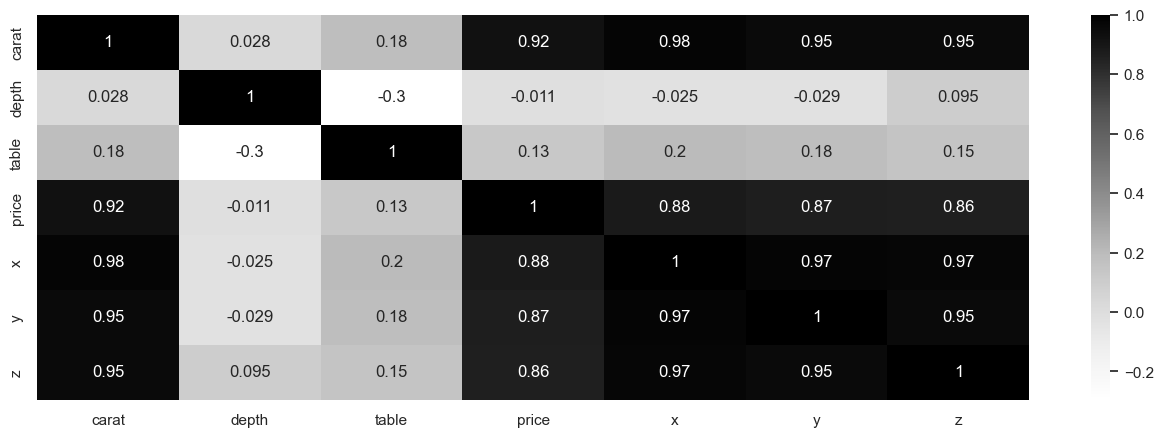

In [9]:
correlation = diamonds.corr()
sns.heatmap(data = correlation, annot = True, cmap = "Greys" )
plt.show()

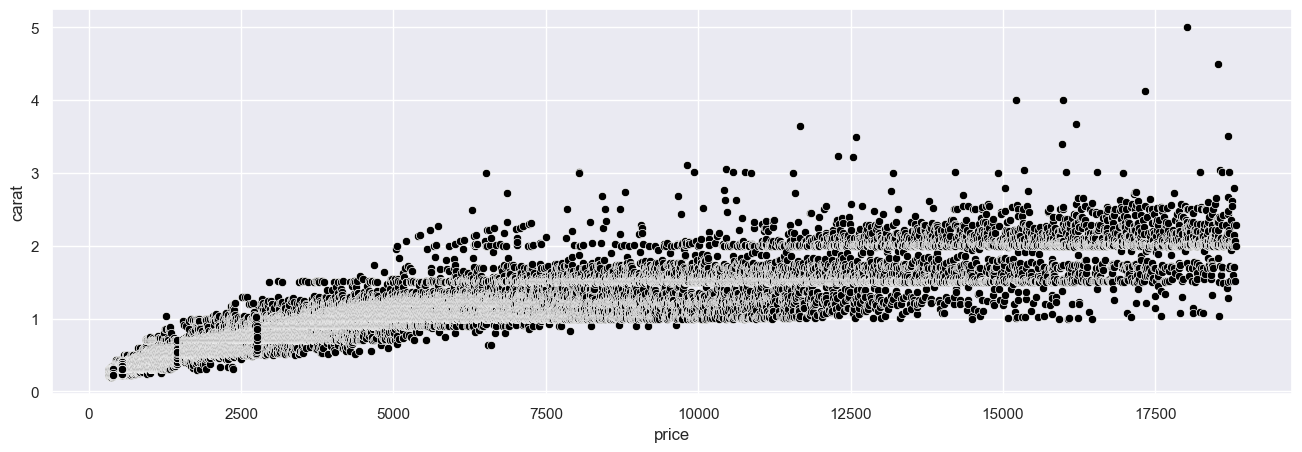

In [10]:
sns.scatterplot(data = diamonds, x = "price", y = "carat", color = "black")
plt.show()

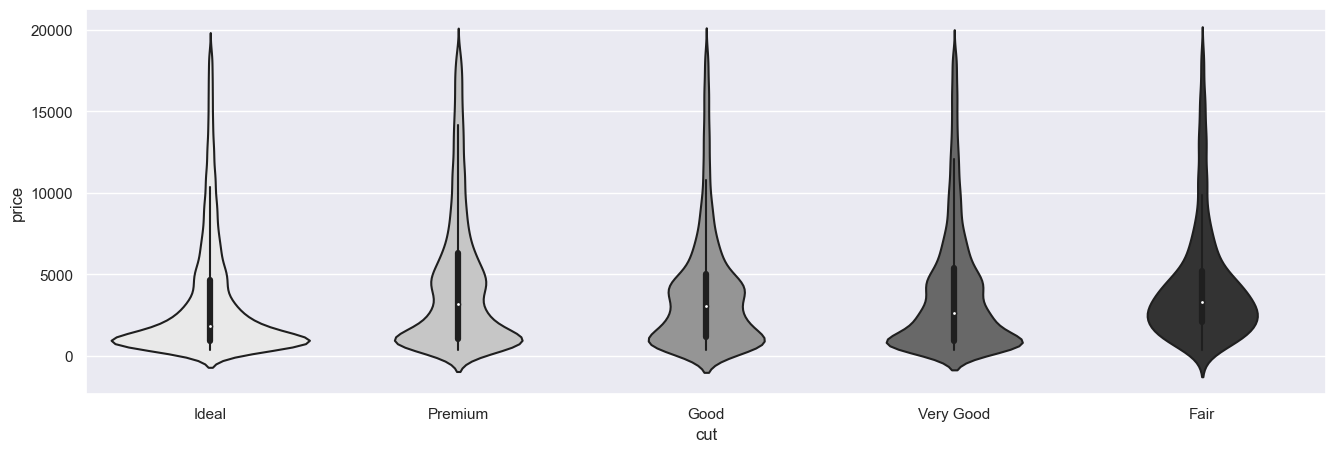

In [11]:
sns.violinplot(data = diamonds, x = "cut", y = "price", palette = "Greys")
plt.show()

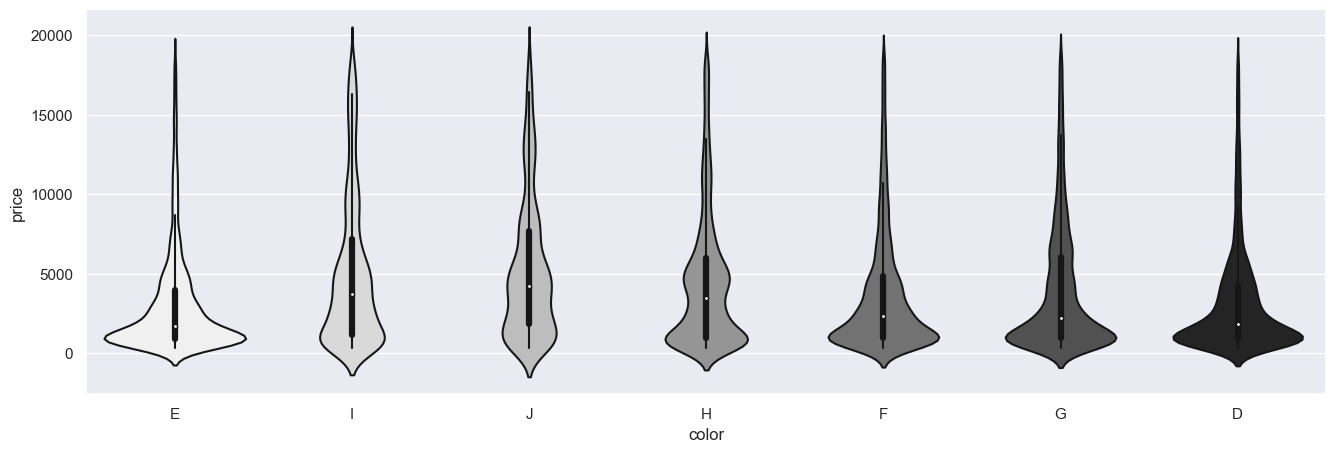

In [12]:
sns.violinplot(data = diamonds, x = "color", y = "price", palette = "Greys")
plt.show()

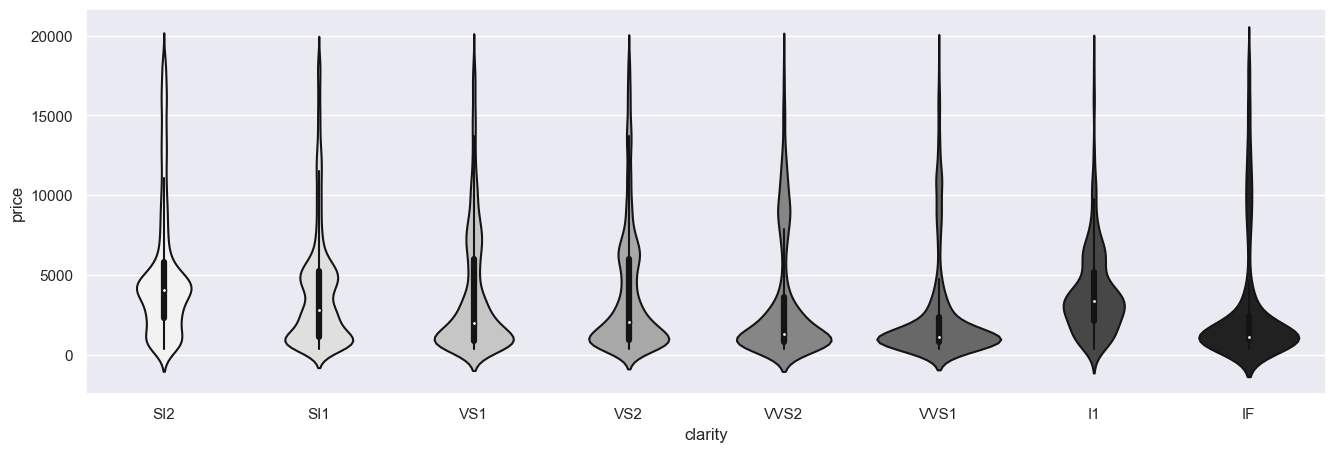

In [13]:
sns.violinplot(data = diamonds, x = "clarity", y = "price", palette = "Greys")
plt.show()

# Task 7: Conceptualize the problem

First model: Linear Regression
- Columns "carat", "x", "y", and "z" seem to have a linear relationship with price (according to our heatmap). For the Linear Regression model we will use these columns. 
    - First we will scale the data and then perform our split.


Second and third model: Deicison Tree and Random Forest
- We will use "cut", "color", and "clarity" to see how they affect diamond prices. We will use a decision tree and random forest so that we can predict prices based on the decisions made from the features that will be turned into columns based on true or false values. For example, if the "cut" is true for "ideal", the models will go to the next node until they reached all nodes to make a final decision on price.
    - First we must convert all non-numeric variables to numeric and then perform our split. 
    
We will drop "depth" and "table" as they seem the least connected to price and will not be used in any of our models. 

In [14]:
diamonds.drop(["depth","table"], axis = 1, inplace = True)

In [15]:
diamonds.head(2)

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31


In [16]:
#linear model
diamonds_linear = diamonds[['carat', 'x', 'y', 'z', 'price']]

scaler = StandardScaler()
scaler.fit(diamonds_linear.drop('price', axis = 1))

StandardScaler()

In [17]:
scaled_features = scaler.transform(diamonds_linear.drop('price', axis = 1))
df_feat = pd.DataFrame(scaled_features, columns = diamonds_linear.columns[:-1])
df_feat.head()

,carat,x,y,z
0,-1.198168,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.498691,-1.457395,-1.741175
3,-1.071587,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.240167,-1.212238,-1.117674


In [18]:
#Decision tree and random forest
diamonds_dt_rf = diamonds[['cut', 'color', 'clarity', 'price']]
diamonds_dt_rf

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53935,Ideal,D,SI1,2757
53936,Good,D,SI1,2757
53937,Very Good,D,SI1,2757
53938,Premium,H,SI2,2757


In [19]:
diamonds_cat = diamonds_dt_rf.select_dtypes(include=['object'])
diamonds_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [20]:
diamonds_dummies = pd.get_dummies(diamonds_cat, drop_first = True)
diamonds_dummies.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [21]:
diamonds_dt_rf= diamonds_dt_rf.drop(list(diamonds_cat.columns), axis=1)

In [22]:
diamonds_dt_rf= pd.concat([diamonds_dt_rf, diamonds_dummies], axis=1)

In [23]:
diamonds_dt_rf.head()

,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [24]:
x = diamonds_dt_rf.loc[:, ['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']]

In [25]:
y = diamonds_dt_rf["price"]

# Task 8: Perform Data-Split

In [26]:
#We want our models to predict the price

In [27]:
#Linear Regression
x_train, x_test, y_train, y_test = train_test_split(scaled_features, diamonds['price'], test_size = 0.25)

In [28]:
#Decision tree and random forest
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.25)

In [29]:
print(f'The shape of the data is: \nx_train: \t{x_train.shape} \nx_test: \t{x_test.shape} \ny_train: \t{y_train.shape} \ny_test: \t{y_test.shape}')

The shape of the data is: 
x_train: 	(40455, 4) 
x_test: 	(13485, 4) 
y_train: 	(40455,) 
y_test: 	(13485,)


In [30]:
print(f'The shape of the data is: \nx_train: \t{x_train2.shape} \nx_test: \t{x_test2.shape} \ny_train: \t{y_train2.shape} \ny_test: \t{y_test2.shape}')

The shape of the data is: 
x_train: 	(40455, 17) 
x_test: 	(13485, 17) 
y_train: 	(40455,) 
y_test: 	(13485,)


# Task 9: Choose the ML Method to follow

In [31]:
linearregression_model = LinearRegression()
decisiontree_model = DecisionTreeRegressor()
randomforest_model = RandomForestRegressor()

# Task 10: Train the ML Model

In [32]:
linearregression_model.fit(x_train, y_train)

LinearRegression()

In [33]:
decisiontree_model.fit(x_train2, y_train2)

DecisionTreeRegressor()

In [34]:
randomforest_model.fit(x_train2, y_train2)

RandomForestRegressor()

In [35]:
accuracy_linear = linearregression_model.score(x_test, y_test)
accuracy_decisiontree = decisiontree_model.score(x_test2.values, y_test2)
accuracy_randomforest = randomforest_model.score(x_test2, y_test2)

/Users/nayelijaime/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [36]:
models = {'linearregression_model': accuracy_linear, 'decisiontree_model': accuracy_decisiontree, 'randomforest_model': accuracy_randomforest}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score, 4)}')

The accuracy score for the linearregression_model is 0.8513
The accuracy score for the decisiontree_model is 0.0882
The accuracy score for the randomforest_model is 0.0885


# Task 11: Test the Model

In [37]:
diamonds.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [38]:
df_feat.head()

,carat,x,y,z
0,-1.198168,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.498691,-1.457395,-1.741175
3,-1.071587,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.240167,-1.212238,-1.117674


In [39]:
test_x = np.zeros((1, 4))
test_x

array([[0., 0., 0., 0.]])

In [40]:
#testing linear model
test_x[0, 0] = -1.198168
test_x[0, 1] = -1.587837
test_x[0, 2] = -1.536196
test_x[0, 3] = -1.571129
test_x

array([[-1.198168, -1.587837, -1.536196, -1.571129]])

In [41]:
prediction_linear = linearregression_model.predict(test_x)
round(float(prediction_linear[0]), 2)

60.73

In [42]:
#Decision tree and random forest
diamonds_dt_rf.head()

,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [43]:
test_x2 = np.zeros((1, 17))
test_x2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [44]:
test_x2[0, 0] = 0
test_x2[0, 1] = 1
test_x2[0, 2] = 0
test_x2[0, 3] = 0
test_x2[0, 4] = 1
test_x2[0, 5] = 0
test_x2[0, 6] = 0
test_x2[0, 7] = 0
test_x2[0, 8] = 0
test_x2[0, 9] = 0
test_x2[0, 10] = 0
test_x2[0, 11] = 0
test_x2[0, 12] = 1
test_x2[0, 13] = 0
test_x2[0, 14] = 0
test_x2[0, 15] = 0
test_x2[0, 16] = 0
test_x2

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.]])

In [45]:
prediction_decisiontree = decisiontree_model.predict(test_x2)
round(float(prediction_decisiontree[0]), 2)

/Users/nayelijaime/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


3853.32

In [46]:
prediction_randomforest = randomforest_model.predict(test_x2)
round(float(prediction_randomforest[0]), 2)

/Users/nayelijaime/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


3824.68

## Download models

In [47]:
with open('linear_file', 'wb') as file:
    model = pickle.dump(linearregression_model, file)

In [48]:
with open('decisiontree_file', 'wb') as file:
    model = pickle.dump(decisiontree_model, file)

In [49]:
with open('randomforest_file', 'wb') as file:
    model = pickle.dump(randomforest_model, file)